In [20]:
#Biblioteki
import pandas as pd
import seaborn as sns

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/janszopa/ML_intro_24-25/refs/heads/main/data/Loan_Default.csv')

In [10]:
data.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [15]:
rows = data.shape[0]
col = data.shape[1]
print(f'Wiersze: {rows}, Kolumny: {col}')

Wiersze: 148670, Kolumny: 34


In [16]:
data.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [21]:
# Winoski 
# year -> jedyna wartóść to 2019
# rate_of_interest min -> 0, dziwne?
# Interest_rate_spread wartosc min < 0, dziwne?
# Income min < 0
# Przy wykresach zwrocic uwage na atrybut term 

In [19]:
data.info()
print("\nBraki w danych:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

/Users/mikolajguzek-szopa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


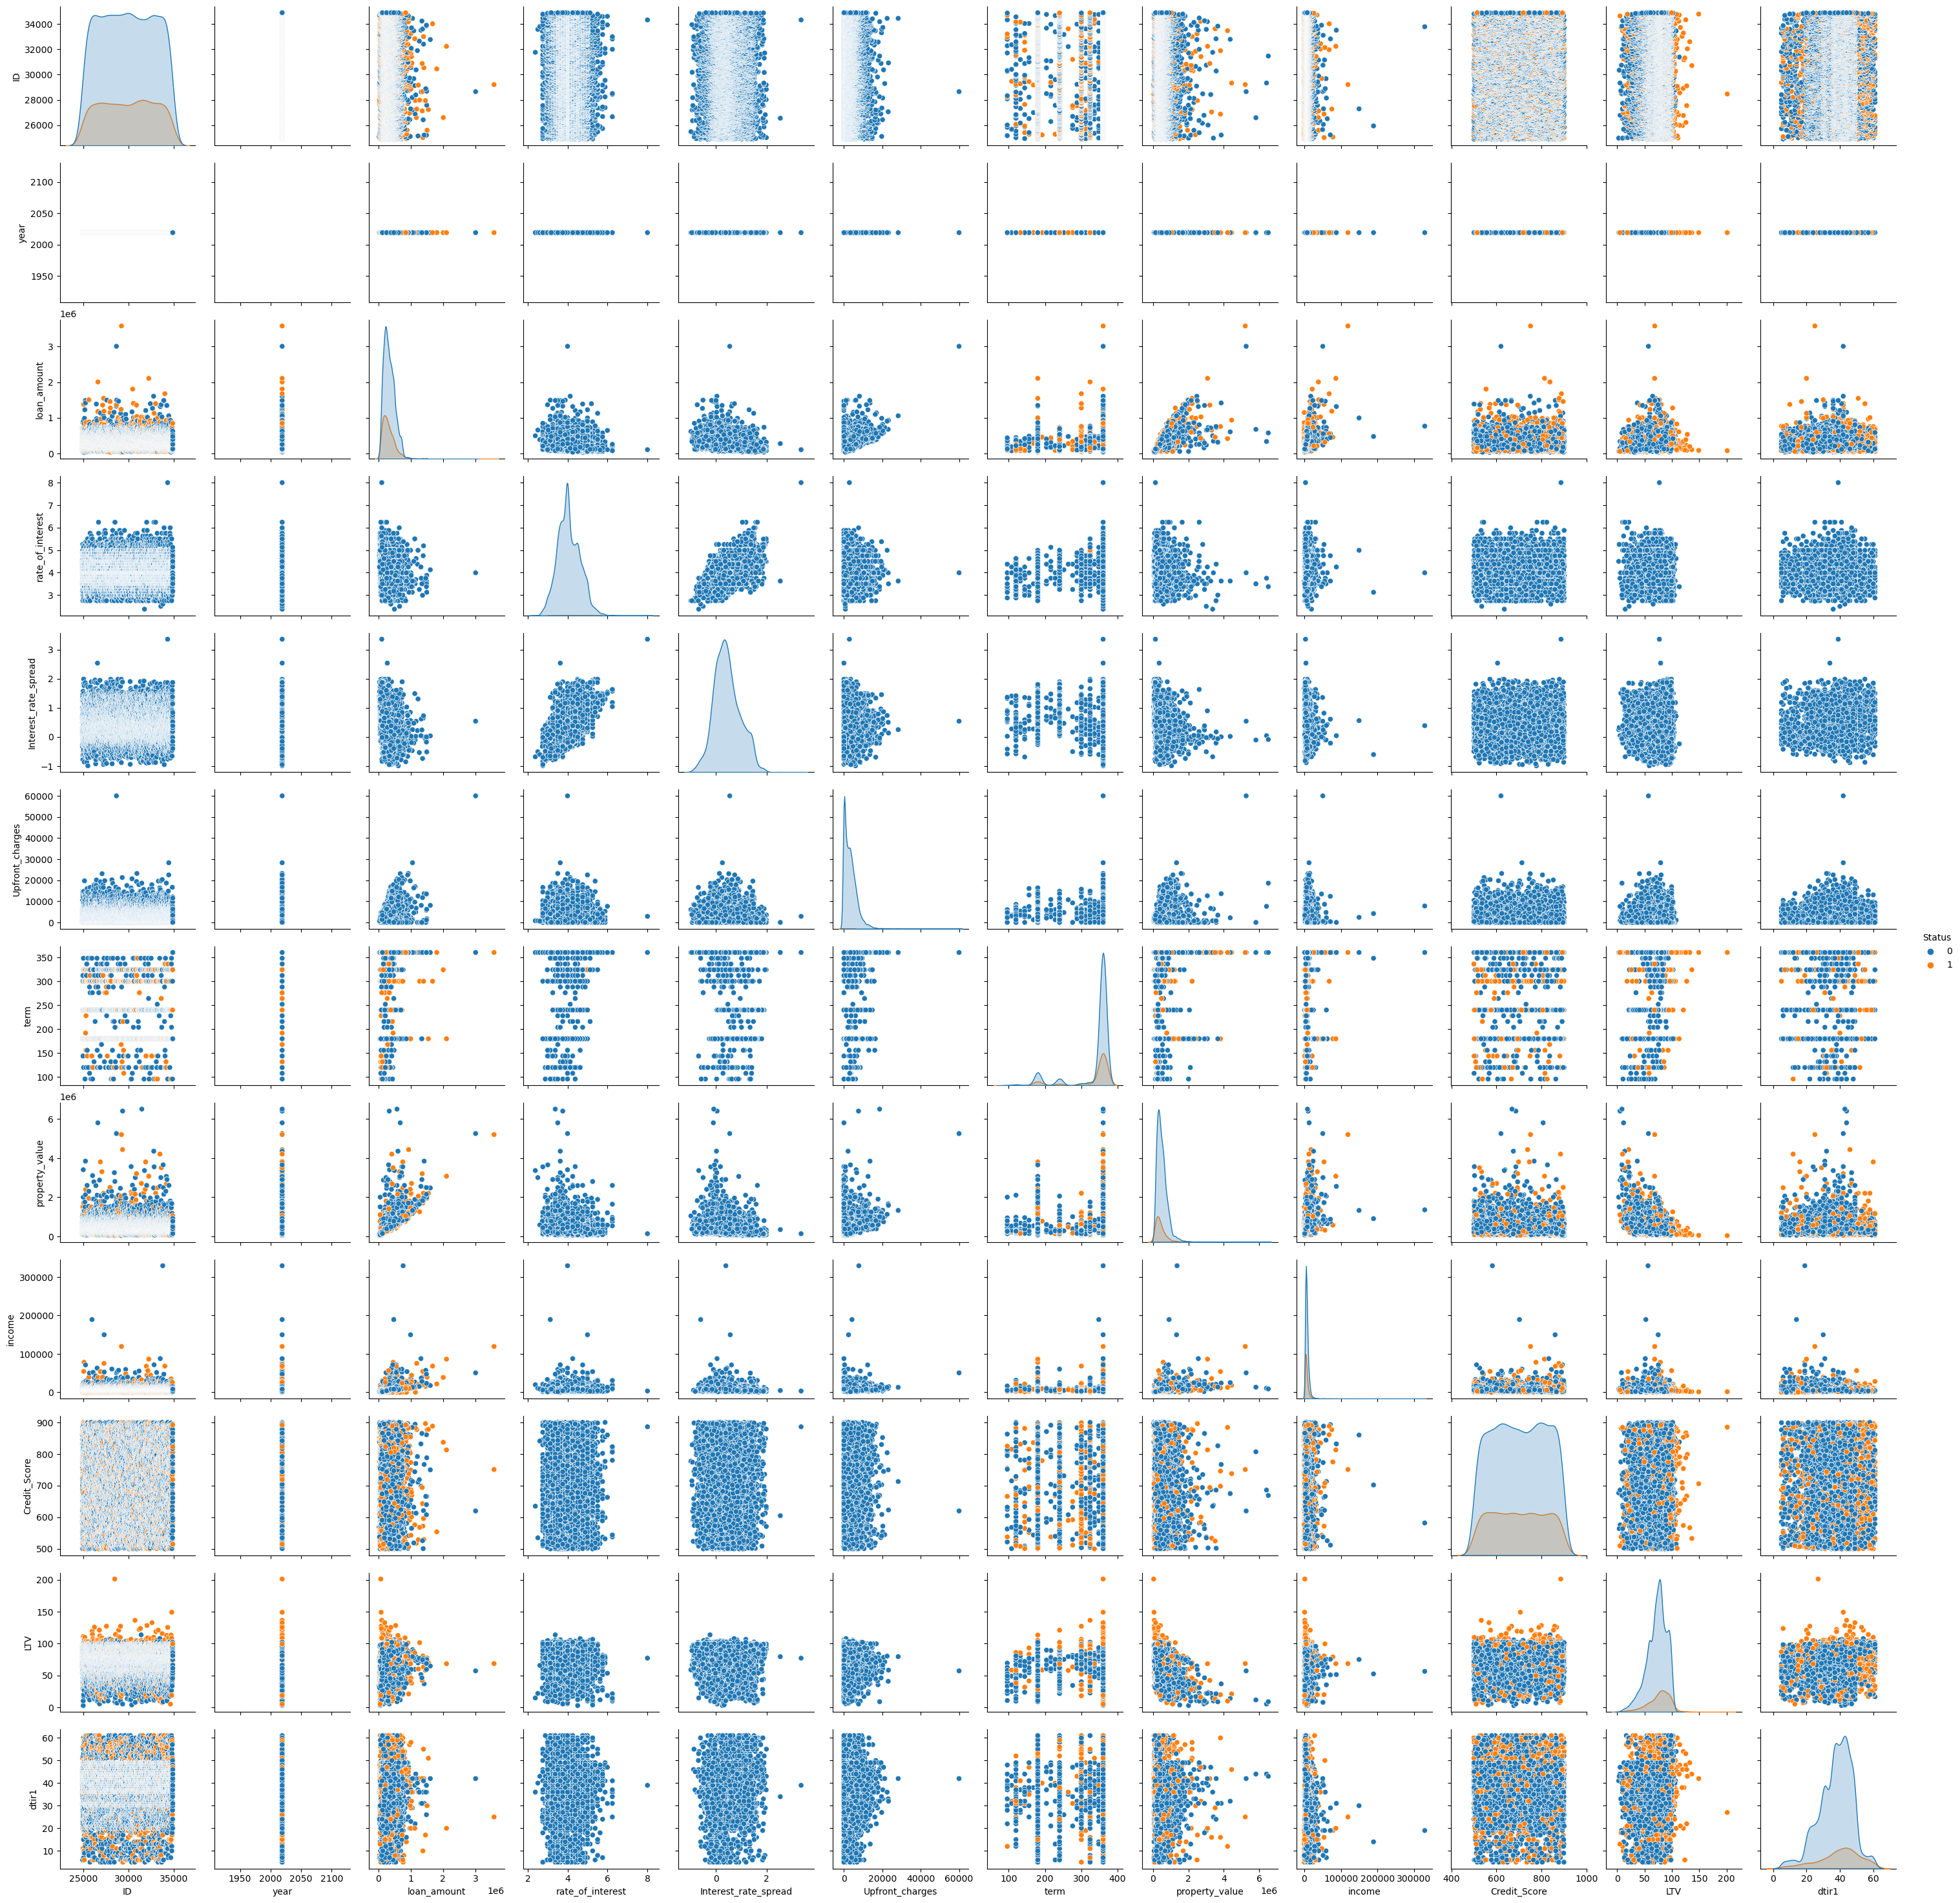

In [26]:
sns.pairplot(data[:10_000], hue='Status')


In [ ]:
# Winoski
# Credit_score wazne dla decyzji o kredycue(status)
# Im wyzsze Loan_amount tym więcej odmów kredytu(pomaranczowy kolor)


In [27]:
data['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [ ]:
# Winoski
# Liczba wartości null w rate_of_interest, Interest_rate_spread, Upfront_charges jest bardzo podobna do liczby odmów kredytu

In [36]:
data.loc[data['Status'] == 1 & ~data['Interest_rate_spread'].isnull()]

Empty DataFrame
Columns: [ID, year, loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, loan_amount, rate_of_interest, Interest_rate_spread, Upfront_charges, term, Neg_ammortization, interest_only, lump_sum_payment, property_value, construction_type, occupancy_type, Secured_by, total_units, income, credit_type, Credit_Score, co-applicant_credit_type, age, submission_of_application, LTV, Region, Security_Type, Status, dtir1]
Index: []

[0 rows x 34 columns]

In [38]:
data1 = data.loc[data['Status'] == 1 & ~data['rate_of_interest'].isnull()]
data1['rate_of_interest']

266       3.750
706       4.625
1150      3.750
1219      4.500
3533      3.875
          ...  
145071    3.990
147037    4.875
147799    3.990
147974    3.750
148239    3.750
Name: rate_of_interest, Length: 200, dtype: float64

In [41]:
# Wnioski
# Osoby nie mające null w rate_of_interest i mające status 1, mają null w age i w submission_of_application
# moze to wynikać z błędów w danych
# 


<Axes: xlabel='Status', ylabel='LTV'>

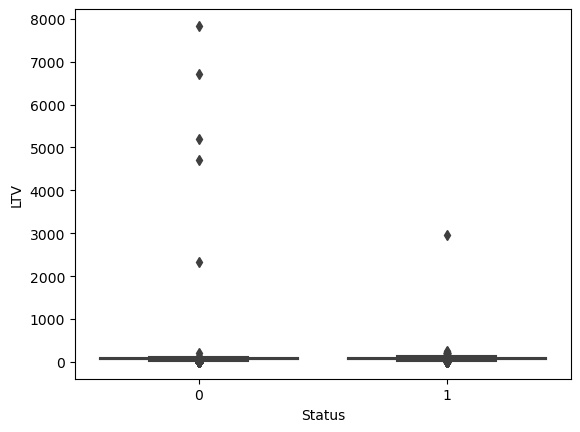

In [33]:
sns.boxplot(x = data['Status'],y = data['LTV'])

In [ ]:
# Winoski TODO
# Obiciac wartosci odstajace i wtedy porobic wykresy
# Sprawdzic korelacje miedzy danymi